# Credit Card Fraud Detection

#### Required Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#read data
os.chdir(r'C:\Users\Admin\Documents\Kaggle')
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Find the shape of data and basic details
print(data.shape)
data.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#Check null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#check number of fraud and valid cases

fraud = len(data[data['Class']==1])
valid = len(data[data['Class']==0])
print('Total fraud transactions : ',fraud)
print('Total valid transactions : ',valid)

Total fraud transactions :  492
Total valid transactions :  284315


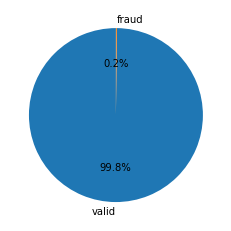

In [6]:
plt.pie([valid,fraud],labels=['valid','fraud'],startangle=90,autopct='%1.1f%%')
plt.show()

In [7]:
print("Outlier Fraction : ", (fraud/valid))

Outlier Fraction :  0.0017304750013189597


<AxesSubplot:>

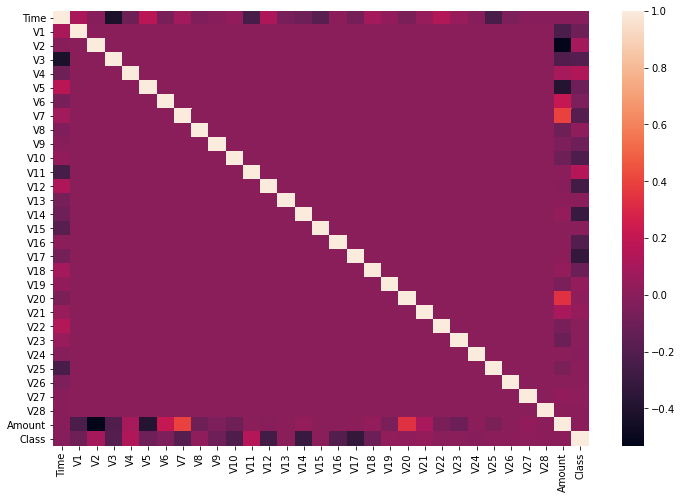

In [8]:
## Heatmap of correlation between columns of data
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

#### Interpretation

- Class is not much correlated with Amount and Time.
- Class is negatively correlated with V3, V7, V10, V12, V14, V17
- Class is positively correlated with V2, V4, V11

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amount')

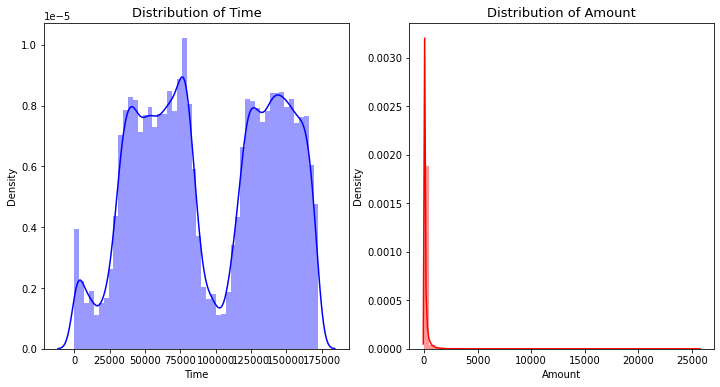

In [9]:
#Check the distribution of time and amount

f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1 = sns.distplot(data['Time'],ax=ax1,color='blue')
ax2 = sns.distplot(data['Amount'],ax=ax2,color='red')
ax1.set_title('Distribution of Time',fontsize=13)
ax2.set_title('Distribution of Amount',fontsize=13)

#### To normalize the distribution used a method called Feature Scaling.

In [10]:
ss = StandardScaler()
data['Scaled_Amount'] = ss.fit_transform(data['Amount'].values.reshape(-1,1))
data['Scaled_Time'] = ss.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'],axis=1,inplace=True)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249,1.641974


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amount')

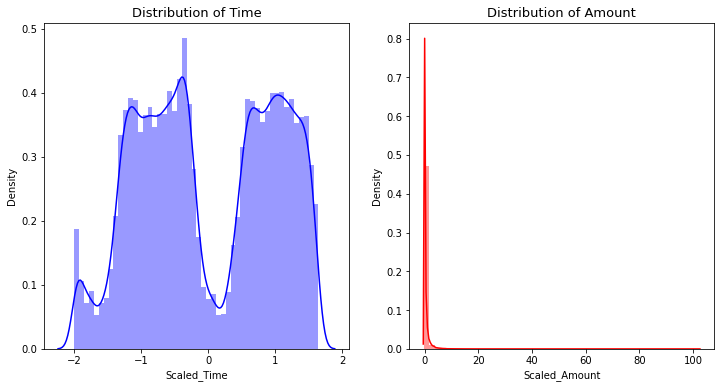

In [11]:
#Check the distribution of time and amount after scaling

f, (ax3,ax4) = plt.subplots(1,2,figsize=(12,6))
ax3 = sns.distplot(data['Scaled_Time'],ax=ax3,color='blue')
ax4 = sns.distplot(data['Scaled_Amount'],ax=ax4,color='red')
ax3.set_title('Distribution of Time',fontsize=13)
ax4.set_title('Distribution of Amount',fontsize=13)

In [12]:
Scaled_Amount = data['Scaled_Amount']
Scaled_Time = data['Scaled_Time']
data.drop(['Scaled_Amount','Scaled_Time'],axis=1,inplace=True)
data.insert(0,'Scaled_Amount',Scaled_Amount)
data.insert(0,'Scaled_Time',Scaled_Time)
data.head()

,Scaled_Time,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
#Assign predictors and target variables
X = data.drop(['Class'],axis=1)
y = data['Class']
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [15]:
# Separate the predictor and target to train and test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=100)
Xtrain,Xval,ytrain,yval = train_test_split(Xtrain,ytrain,test_size=0.3,random_state=100)

In [16]:
#Find the shape of train data
print(Xtrain.shape)
print(ytrain.shape)

(159491, 30)
(159491,)


In [17]:
#Find the shape of validation data
print(Xval.shape)
print(yval.shape)

(68354, 30)
(68354,)


In [18]:
#Find the shape of test data
print(Xtest.shape)
print(ytest.shape)

(56962, 30)
(56962,)


#### KMeans Clustering

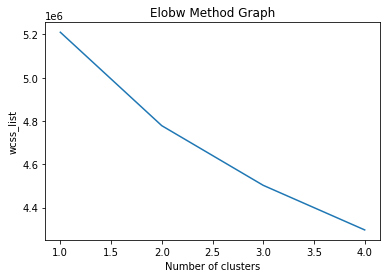

In [20]:
#finding optimal number of clusters using the elbow method  

from sklearn.cluster import KMeans
wcss_list=[]   #Initialize list to store values of Within cluster Sum of Squares

for i in range(1,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)   #selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    kmeans.fit(Xtrain)
    wcss_list.append(kmeans.inertia_)
    
# plot visual for elbow chart
plt.plot(range(1,5),wcss_list)
plt.title('Elobw Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss_list')

plt.show()


In [21]:
#training the K-means model on a dataset  

kmeans = KMeans(n_clusters=2,init='k-means++',random_state=100)
kmeans.fit(Xtrain,ytrain)


KMeans(n_clusters=2, random_state=100)

In [22]:
#predict y
k_ypred = kmeans.fit_predict(Xval)
k_ypred

array([1, 1, 1, ..., 0, 0, 1])

<AxesSubplot:>

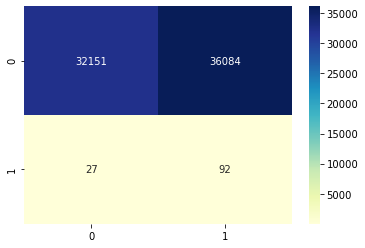

In [24]:
#confusion matrix

c = confusion_matrix(yval,k_ypred)
sns.heatmap(pd.DataFrame(c),annot=True,cmap='YlGnBu',fmt='g')

In [25]:
#performance metrics for KMeans

k_acc = accuracy_score(yval,k_ypred)
print('Accuracy score : ',k_acc)

k_prec = precision_score(yval, k_ypred)
print('Precision score : ',k_prec)

k_rec = recall_score(yval,k_ypred)
print('Recall score : ',k_rec)

k_f1 = f1_score(yval,k_ypred)
print('f1 score : ',k_f1)


Accuracy score :  0.4717061181496328
Precision score :  0.0025431225121627598
Recall score :  0.773109243697479
f1 score :  0.00506956881113101


In [26]:
#used in machine learning as a measure of the quality of binary and multiclass classifications

MCC = matthews_corrcoef(yval, k_ypred)
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.020402927173697693


#### KNN

In [35]:
#Train the model using Training Dataset

knn = KNeighborsClassifier()
knn.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [36]:
#predict y

knn_ypred = knn.predict(Xval)
knn_ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

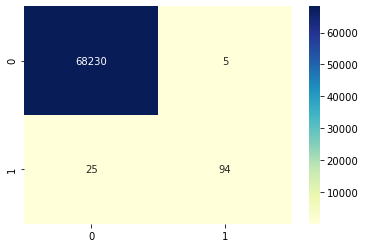

In [37]:
#confusion matrix

c = confusion_matrix(yval,knn_ypred)
sns.heatmap(pd.DataFrame(c),annot=True,cmap='YlGnBu',fmt='g')

In [38]:
#performance metrics for KNN

knn_acc = accuracy_score(yval,knn_ypred)
print('Accuracy score : ',knn_acc)

knn_prec = precision_score(yval, knn_ypred)
print('Precision score : ',knn_prec)

knn_rec = recall_score(yval,knn_ypred)
print('Recall score : ',knn_rec)

knn_f1 = f1_score(yval,knn_ypred)
print('f1 score : ',knn_f1)


Accuracy score :  0.9995611083477193
Precision score :  0.9494949494949495
Recall score :  0.7899159663865546
f1 score :  0.8623853211009174


#### Decision Tree

In [40]:
#Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

#Train the model using Training Dataset
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [41]:
#Predict y
dt_ypred = dt.predict(Xval)
dt_ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

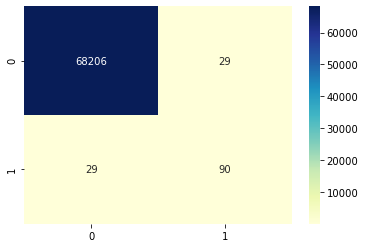

In [42]:
#confusion matrix

c = confusion_matrix(yval,dt_ypred)
sns.heatmap(pd.DataFrame(c),annot=True,cmap='YlGnBu',fmt='g')

In [43]:
#performance metrics of decision tree

dt_acc = accuracy_score(yval,dt_ypred)
print('Accuracy score : ',dt_acc)

dt_prec = precision_score(yval, dt_ypred)
print('Precision score : ',dt_prec)

dt_rec = recall_score(yval,dt_ypred)
print('Recall score : ',dt_rec)

dt_f1 = f1_score(yval,dt_ypred)
print('f1 score : ',dt_f1)


Accuracy score :  0.9991514761389239
Precision score :  0.7563025210084033
Recall score :  0.7563025210084033
f1 score :  0.7563025210084033


### Model Selection

In [45]:
models = pd.DataFrame({'Model' : ['KMeans Clustering','K - Nearest Neighbors','Decision Tree'],
                       'Accuracy Score' : [k_acc,knn_acc,dt_acc]})
models.sort_values(by='Accuracy Score',ascending=False)


,Model,Accuracy Score
1,K - Nearest Neighbors,0.999561
2,Decision Tree,0.999151
0,KMeans Clustering,0.471706


#### The best model is K - Nearest Neighbors with 99.95% accuracy  

### Model Testing

In [46]:
#Predict y using test data with KNN

ypred = knn.predict(Xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

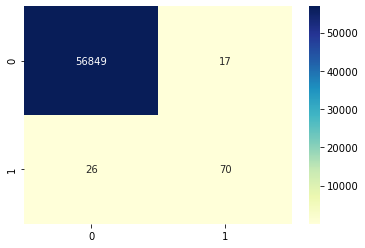

In [47]:
#confusion matrix

c = confusion_matrix(ytest,ypred)
sns.heatmap(pd.DataFrame(c),annot=True,cmap='YlGnBu',fmt='g')

In [48]:
#performance metrics of KNN with test data

acc = accuracy_score(ytest,ypred)
print('Accuracy score : ',acc)

prec = precision_score(ytest,ypred)
print('Precision score : ',prec)

rec = recall_score(ytest,ypred)
print('Recall score : ',rec)

f1 = f1_score(ytest,ypred)
print('f1 score : ',f1)


Accuracy score :  0.9992451107756047
Precision score :  0.8045977011494253
Recall score :  0.7291666666666666
f1 score :  0.7650273224043717


#### Interpret

- Out of 56866 actual positive cases 17 have been predicted falsely as negative
- Out of 96 actual negative cases 26 have been predicted falsely as positive